# 6.1 Sourcing Open Data

## This script contains the following points:

### 1. Import the data and libraries
### 2. Combine the data
### 3. Wrangle the data
### 4. Complete the data quality and consistency checks
### 5. Check descriptive statistics
### 6. Export the new dataframe

## 1. Import the data and libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign project folder path to a variable

path = r'C:\Users\jomok\Documents\Career Foundry\Achievement 6\09-2023 FHL Bank Data Analysis'

In [3]:
# Import data

df_2022 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '2022_PUDB_EXPORT_123122.csv'), index_col = False)
df_2021 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '2021_PUDB_EXPORT_123121.csv'), index_col = False)
df_2020 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '2020_PUDB_EXPORT_123120.csv'), index_col = False)
df_2019 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '2019_PUDB_EXPORT_123119.csv'), index_col = False)

In [4]:
# Check output

df_2022.head()

,Year,LoanCharacteristicsID,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
0,2022,2715212,Boston,50,5,99999,9579.00,6.482,75769,77189,...,7,7,7,2,7,7,7,7,2,1
1,2022,2715213,Boston,9,11,35980,7081.00,9.144,95750,94894,...,7,7,7,2,7,7,7,7,2,1
2,2022,2715214,Boston,44,7,39300,130.02,8.211,90060,89555,...,7,7,7,2,7,7,7,7,2,1
3,2022,2715215,Boston,50,7,15540,27.01,14.861,113558,95011,...,7,7,7,2,7,7,7,7,2,1
4,2022,2715216,Boston,23,31,38860,220.00,7.682,66887,89988,...,7,7,7,5,8,8,8,8,2,1


In [5]:
# Check shape

df_2022.shape

(33018, 56)

## 2. Combine the data

In [6]:
# Check columns of 2022 data set

df_2022.columns

Index(['Year', 'LoanCharacteristicsID', 'Bank', 'FIPSStateNumericCode',
       'FIPSCountyCode', 'CoreBasedStatisticalAreaCode',
       'CensusTractIdentifier', 'CensusTractMinorityRatioPercent',
       'CensusTractMedFamIncomeAmount', 'LocalAreaMedianIncomeAmount',
       'TotalMonthlyIncomeAmount', 'HUDMedianIncomeAmount',
       'LoanAcquisitionActualUPBAmt', 'LTVRatioPercent', 'NoteDate',
       'LoanAcquistionDate', 'LoanPurposeType', 'ProductCategoryName',
       'MortgageType', 'ScheduledTotalPaymentCount',
       'LoanAmortizationMaxTermMonths', 'MortgageLoanSellerInstType',
       'BorrowerCount', 'BorrowerFirstTimeHomebuyer', 'Borrower1Race1Type',
       'Borrower2Race1Type', 'Borrower1GenderType', 'Borrower2GenderType',
       'Borrower1AgeAtApplicationYears', 'Borrower2AgeAtApplicationYears',
       'PropertyUsageType', 'PropertyUnitCount', 'NoteRatePercent',
       'NoteAmount', 'HousingExpenseRatioPercent',
       'TotalDebtExpenseRatioPercent', 'Borrower1CreditScoreValue

In [7]:
# Drop unnecessary columns

df_2022.drop(['Bank', 'CoreBasedStatisticalAreaCode','CensusTractIdentifier', 'CensusTractMinorityRatioPercent', 'CensusTractMedFamIncomeAmount', 'LocalAreaMedianIncomeAmount', 'HUDMedianIncomeAmount', 'LoanAcquisitionActualUPBAmt', 'LTVRatioPercent', 'NoteDate', 'LoanAcquistionDate', 'ProductCategoryName', 'ScheduledTotalPaymentCount', 'LoanAmortizationMaxTermMonths', 'MortgageLoanSellerInstType', 'HousingExpenseRatioPercent', 'PMICoveragePercent', 'EmploymentBorrowerSelfEmployed', 'IndexSourceType', 'MarginRatePercent', 'PrepaymentPenaltyExpirationDate', 'Borrower1Race2Type', 'Borrower1Race3Type', 'Borrower1Race4Type', 'Borrower1Race5Type', 'Borrower2Race2Type', 'Borrower2Race3Type', 'Borrower2Race4Type', 'Borrower2Race5Type', 'HOEPALoanStatusType', 'LienPriorityType'], axis = 1, inplace=True)

In [8]:
# Check output

df_2022.head()

,Year,LoanCharacteristicsID,FIPSStateNumericCode,FIPSCountyCode,TotalMonthlyIncomeAmount,LoanPurposeType,MortgageType,BorrowerCount,BorrowerFirstTimeHomebuyer,Borrower1Race1Type,...,PropertyUsageType,PropertyUnitCount,NoteRatePercent,NoteAmount,TotalDebtExpenseRatioPercent,Borrower1CreditScoreValue,Borrower2CreditScoreValue,PropertyType,Borrower1EthnicityType,Borrower2EthnicityType
0,2022,2715212,50,5,23009,1,0,2,0,5,...,2,1,4.375,320000,30.57,5,4,PT01,2,2
1,2022,2715213,9,11,8774,1,0,2,0,5,...,1,1,5.750,136000,20.05,3,3,PT01,2,2
2,2022,2715214,44,7,14102,6,0,2,0,5,...,1,1,5.250,350000,29.96,3,2,PT01,2,2
3,2022,2715215,50,7,10789,1,0,2,1,5,...,1,1,4.375,437000,45.17,5,4,PT01,2,2
4,2022,2715216,23,31,5209,6,0,1,0,5,...,1,1,5.125,200000,31.83,5,9,PT01,2,5


In [9]:
# Check shape

df_2022.shape

(33018, 25)

In [10]:
# Check output of 2021 data set

df_2021.head()

,Year,LoanCharacteristicsID,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
0,2021,2585135,Boston,23,5,38860,45.02,6.379,91316,85144,...,7,7,7,3,7,7,7,7,2,1
1,2021,2585136,Boston,23,5,38860,41.00,3.553,100396,85144,...,7,7,7,5,8,8,8,8,2,1
2,2021,2585137,Boston,25,27,49340,7011.00,8.537,87500,91102,...,7,7,7,5,8,8,8,8,2,1
3,2021,2585138,Boston,25,27,49340,7001.00,6.052,114531,91102,...,7,7,7,2,7,7,7,7,2,1
4,2021,2585139,Boston,25,27,49340,7061.00,3.583,119423,91102,...,7,7,7,5,8,8,8,8,2,1


In [11]:
# Check shape of 2021 data set

df_2021.shape

(63890, 56)

In [12]:
# Check columns of 2021 data set

df_2021.columns

Index(['Year', 'LoanCharacteristicsID', 'Bank', 'FIPSStateNumericCode',
       'FIPSCountyCode', 'CoreBasedStatisticalAreaCode',
       'CensusTractIdentifier', 'CensusTractMinorityRatioPercent',
       'CensusTractMedFamIncomeAmount', 'LocalAreaMedianIncomeAmount',
       'TotalMonthlyIncomeAmount', 'HUDMedianIncomeAmount',
       'LoanAcquisitionActualUPBAmt', 'LTVRatioPercent', 'NoteDate',
       'LoanAcquisitionDate', 'LoanPurposeType', 'ProductCategoryName',
       'MortgageType', 'ScheduledTotalPaymentCount',
       'LoanAmortizationMaxTermMonths', 'MortgageLoanSellerInstType',
       'BorrowerCount', 'BorrowerFirstTimeHomebuyer', 'Borrower1Race1Type',
       'Borrower2Race1Type', 'Borrower1GenderType', 'Borrower2GenderType',
       'Borrower1AgeAtApplicationYears', 'Borrower2AgeAtApplicationYears',
       'PropertyUsageType', 'PropertyUnitCount', 'NoteRatePercent',
       'NoteAmount', 'HousingExpenseRatioPercent',
       'TotalDebtExpenseRatioPercent', 'Borrower1CreditScoreValu

In [13]:
# Drop unnecessary columns from 2021 data set

df_2021.drop(['Bank', 'CoreBasedStatisticalAreaCode', 'CensusTractIdentifier', 'CensusTractMinorityRatioPercent', 'CensusTractMedFamIncomeAmount', 'LocalAreaMedianIncomeAmount', 'HUDMedianIncomeAmount', 'LoanAcquisitionActualUPBAmt', 'LTVRatioPercent', 'NoteDate', 'LoanAcquisitionDate', 'ProductCategoryName', 'ScheduledTotalPaymentCount', 'LoanAmortizationMaxTermMonths', 'MortgageLoanSellerInstType', 'HousingExpenseRatioPercent', 'PMICoveragePercent', 'EmploymentBorrowerSelfEmployed', 'IndexSourceType', 'MarginRatePercent', 'PrepaymentPenaltyExpirationDate', 'Borrower1Race2Type', 'Borrower1Race3Type', 'Borrower1Race4Type', 'Borrower1Race5Type', 'Borrower2Race2Type', 'Borrower2Race3Type', 'Borrower2Race4Type', 'Borrower2Race5Type', 'HOEPALoanStatusType', 'LienPriorityType' ], axis = 1, inplace=True)

In [14]:
# Check output

df_2021.head()

,Year,LoanCharacteristicsID,FIPSStateNumericCode,FIPSCountyCode,TotalMonthlyIncomeAmount,LoanPurposeType,MortgageType,BorrowerCount,BorrowerFirstTimeHomebuyer,Borrower1Race1Type,...,PropertyUsageType,PropertyUnitCount,NoteRatePercent,NoteAmount,TotalDebtExpenseRatioPercent,Borrower1CreditScoreValue,Borrower2CreditScoreValue,PropertyType,Borrower1EthnicityType,Borrower2EthnicityType
0,2021,2585135,23,5,11771,2,0,2,0,6,...,1,1,2.75,352000,21.35,5,5,PT01,3,3
1,2021,2585136,23,5,5651,2,0,1,0,5,...,1,1,2.25,139872,46.77,5,9,PT01,2,5
2,2021,2585137,25,27,9395,6,0,1,0,5,...,1,1,3.00,208000,15.84,5,9,PT01,2,5
3,2021,2585138,25,27,5912,1,0,2,1,5,...,1,1,3.00,228000,42.28,3,3,PT01,2,2
4,2021,2585139,25,27,4420,1,0,1,0,5,...,1,1,3.00,170000,33.05,5,9,PT01,2,5


In [15]:
# Check shape

df_2021.shape

(63890, 25)

In [16]:
# Check output of 2020 data set

df_2020.head()

,Year,LoanCharacteristicsID,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
0,2020,2502613,Boston,23,31,38860,253.0,3.102,87639,80629,...,7,7,7,2,7,7,7,7,2,1
1,2020,2502614,Boston,23,31,38860,240.0,3.211,73967,80629,...,7,7,7,2,7,7,7,7,2,1
2,2020,2502615,Boston,23,31,38860,251.0,4.842,77540,80629,...,7,7,7,5,8,8,8,8,2,1
3,2020,2502616,Boston,23,31,38860,251.0,4.842,77540,80629,...,7,7,7,2,7,7,7,7,2,1
4,2020,2502617,Boston,23,31,38860,52.0,6.101,67672,80629,...,7,7,7,5,8,8,8,8,2,1


In [17]:
# Check shape of 2020 data set

df_2020.shape

(83106, 56)

In [18]:
# Check columns of 2020 data set

df_2020.columns

Index(['Year', 'LoanCharacteristicsID', 'Bank', 'FIPSStateNumericCode',
       'FIPSCountyCode', 'CoreBasedStatisticalAreaCode',
       'CensusTractIdentifier', 'CensusTractMinorityRatioPercent',
       'CensusTractMedFamIncomeAmount', 'LocalAreaMedianIncomeAmount',
       'TotalMonthlyIncomeAmount', 'HUDMedianIncomeAmount',
       'LoanAcquisitionActualUPBAmt', 'LTVRatioPercent', 'NoteDate',
       'LoanAcquistionDate', 'LoanPurposeType', 'ProductCategoryName',
       'MortgageType', 'ScheduledTotalPaymentCount',
       'LoanAmortizationMaxTermMonths', 'MortgageLoanSellerInstType',
       'BorrowerCount', 'BorrowerFirstTimeHomebuyer', 'Borrower1Race1Type',
       'Borrower2Race1Type', 'Borrower1GenderType', 'Borrower2GenderType',
       'Borrower1AgeAtApplicationYears', 'Borrower2AgeAtApplicationYears',
       'PropertyUsageType', 'PropertyUnitCount', 'NoteRatePercent',
       'NoteAmount', 'HousingExpenseRatioPercent',
       'TotalDebtExpenseRatioPercent', 'Borrower1CreditScoreValue

In [19]:
# Drop unnecessary columns from 2020 data set

df_2020.drop(['Bank', 'CoreBasedStatisticalAreaCode', 'CensusTractIdentifier', 'CensusTractMinorityRatioPercent', 'CensusTractMedFamIncomeAmount', 'LocalAreaMedianIncomeAmount', 'HUDMedianIncomeAmount', 'LoanAcquisitionActualUPBAmt', 'LTVRatioPercent', 'NoteDate', 'LoanAcquistionDate', 'ProductCategoryName', 'ScheduledTotalPaymentCount', 'LoanAmortizationMaxTermMonths', 'MortgageLoanSellerInstType', 'HousingExpenseRatioPercent', 'PMICoveragePercent', 'EmploymentBorrowerSelfEmployed', 'IndexSourceType', 'MarginRatePercent', 'PrepaymentPenaltyExpirationDate', 'Borrower1Race2Type', 'Borrower1Race3Type', 'Borrower1Race4Type', 'Borrower1Race5Type', 'Borrower2Race2Type', 'Borrower2Race3Type', 'Borrower2Race4Type', 'Borrower2Race5Type', 'HOEPALoanStatusType', 'LienPriorityType' ], axis = 1, inplace=True)

In [20]:
# Check output of 2020 data set

df_2020.head()

,Year,LoanCharacteristicsID,FIPSStateNumericCode,FIPSCountyCode,TotalMonthlyIncomeAmount,LoanPurposeType,MortgageType,BorrowerCount,BorrowerFirstTimeHomebuyer,Borrower1Race1Type,...,PropertyUsageType,PropertyUnitCount,NoteRatePercent,NoteAmount,TotalDebtExpenseRatioPercent,Borrower1CreditScoreValue,Borrower2CreditScoreValue,PropertyType,Borrower1EthnicityType,Borrower2EthnicityType
0,2020,2502613,23,31,4943,2,0,2,0,5,...,1,1,3.875,177000,34.92,5,4,PT01,2,2
1,2020,2502614,23,31,4958,2,0,2,0,5,...,1,1,3.875,135000,30.76,5,5,PT01,2,2
2,2020,2502615,23,31,10296,6,0,1,0,5,...,1,1,3.750,303200,36.97,4,9,PT01,2,5
3,2020,2502616,23,31,17361,6,0,2,0,5,...,1,1,3.875,185000,13.96,5,5,PT01,2,2
4,2020,2502617,23,31,6350,6,0,1,0,5,...,1,1,3.625,54000,18.61,5,9,PT01,2,5


In [21]:
# Check shape of 2020 data set

df_2020.shape

(83106, 25)

In [22]:
# Check output of 2019 data set

df_2019.head()

,Year,LoanCharacteristicsID,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
0,2019,2407198,Boston,50,7,15540,34.0,4.577,132474,84290,...,7,7,7,5,8,8,8,8,2,1
1,2019,2407199,Boston,50,7,15540,29.0,3.421,100795,84290,...,7,7,7,2,7,7,7,7,2,1
2,2019,2407200,Boston,50,15,99999,9532.0,6.152,49625,67566,...,7,7,7,2,7,7,7,7,2,1
3,2019,2407201,Boston,50,17,30100,9594.0,3.935,62643,67105,...,7,7,7,2,7,7,7,7,2,1
4,2019,2407202,Boston,23,31,38860,254.0,6.031,87679,76445,...,7,7,7,5,8,8,8,8,2,1


In [23]:
# Check shape of 2019 data set

df_2019.shape

(89767, 56)

In [24]:
# Check columns of 2019 data set

df_2019.columns

Index(['Year', 'LoanCharacteristicsID', 'Bank', 'FIPSStateNumericCode',
       'FIPSCountyCode', 'CoreBasedStatisticalAreaCode',
       'CensusTractIdentifier', 'CensusTractMinorityRatioPercent',
       'CensusTractMedFamIncomeAmount', 'LocalAreaMedianIncomeAmount',
       'TotalMonthlyIncomeAmount', 'HUDMedianIncomeAmount',
       'LoanAcquisitionActualUPBAmt', 'LTVRatioPercent', 'NoteDate',
       'LoanAcquistionDate', 'LoanPurposeType', 'ProductCategoryName',
       'MortgageType', 'ScheduledTotalPaymentCount',
       'LoanAmortizationMaxTermMonths', 'MortgageLoanSellerInstType',
       'BorrowerCount', 'BorrowerFirstTimeHomebuyer', 'Borrower1Race1Type',
       'Borrower2Race1Type', 'Borrower1GenderType', 'Borrower2GenderType',
       'Borrower1AgeAtApplicationYears', 'Borrower2AgeAtApplicationYears',
       'PropertyUsageType', 'PropertyUnitCount', 'NoteRatePercent',
       'NoteAmount', 'HousingExpenseRatioPercent',
       'TotalDebtExpenseRatioPercent', 'Borrower1CreditScoreValue

In [25]:
# Drop unnecessary columns from 2019 data set

df_2019.drop(['Bank', 'CoreBasedStatisticalAreaCode', 'CensusTractIdentifier', 'CensusTractMinorityRatioPercent', 'CensusTractMedFamIncomeAmount', 'LocalAreaMedianIncomeAmount', 'HUDMedianIncomeAmount', 'LoanAcquisitionActualUPBAmt', 'LTVRatioPercent', 'NoteDate', 'LoanAcquistionDate', 'ProductCategoryName', 'ScheduledTotalPaymentCount', 'LoanAmortizationMaxTermMonths', 'MortgageLoanSellerInstType', 'HousingExpenseRatioPercent', 'PMICoveragePercent', 'EmploymentBorrowerSelfEmployed', 'IndexSourceType', 'MarginRatePercent', 'PrepaymentPenaltyExpirationDate', 'Borrower1Race2Type', 'Borrower1Race3Type', 'Borrower1Race4Type', 'Borrower1Race5Type', 'Borrower2Race2Type', 'Borrower2Race3Type', 'Borrower2Race4Type', 'Borrower2Race5Type', 'HOEPALoanStatusType', 'LienPriorityType' ], axis = 1, inplace=True)

In [26]:
# Check output of 2019 data set

df_2019.head()

,Year,LoanCharacteristicsID,FIPSStateNumericCode,FIPSCountyCode,TotalMonthlyIncomeAmount,LoanPurposeType,MortgageType,BorrowerCount,BorrowerFirstTimeHomebuyer,Borrower1Race1Type,...,PropertyUsageType,PropertyUnitCount,NoteRatePercent,NoteAmount,TotalDebtExpenseRatioPercent,Borrower1CreditScoreValue,Borrower2CreditScoreValue,PropertyType,Borrower1EthnicityType,Borrower2EthnicityType
0,2019,2407198,50,7,7308,1,1,1,1,5,...,1,1,4.000,319113,40.46,1,9,PT01,2,5
1,2019,2407199,50,7,7416,1,1,2,0,5,...,1,1,4.250,248005,45.67,3,2,PT01,2,2
2,2019,2407200,50,15,5143,1,1,2,0,5,...,1,1,4.250,211105,46.23,2,3,PT01,2,2
3,2019,2407201,50,17,8866,1,2,2,0,5,...,1,1,4.875,210000,36.88,4,2,PT01,2,2
4,2019,2407202,23,31,15240,1,0,1,1,5,...,1,1,4.625,233200,34.95,5,9,PT01,2,5


In [27]:
# Check shape of 2019 data set

df_2019.shape

(89767, 25)

In [28]:
# Concatenate

frames = [df_2019, df_2020, df_2021, df_2022]

In [29]:
df_combined = pd.concat(frames)

In [30]:
# Check output of combined df

df_combined.head()

,Year,LoanCharacteristicsID,FIPSStateNumericCode,FIPSCountyCode,TotalMonthlyIncomeAmount,LoanPurposeType,MortgageType,BorrowerCount,BorrowerFirstTimeHomebuyer,Borrower1Race1Type,...,PropertyUsageType,PropertyUnitCount,NoteRatePercent,NoteAmount,TotalDebtExpenseRatioPercent,Borrower1CreditScoreValue,Borrower2CreditScoreValue,PropertyType,Borrower1EthnicityType,Borrower2EthnicityType
0,2019,2407198,50,7,7308,1,1,1,1,5,...,1,1,4.000,319113,40.46,1,9,PT01,2,5
1,2019,2407199,50,7,7416,1,1,2,0,5,...,1,1,4.250,248005,45.67,3,2,PT01,2,2
2,2019,2407200,50,15,5143,1,1,2,0,5,...,1,1,4.250,211105,46.23,2,3,PT01,2,2
3,2019,2407201,50,17,8866,1,2,2,0,5,...,1,1,4.875,210000,36.88,4,2,PT01,2,2
4,2019,2407202,23,31,15240,1,0,1,1,5,...,1,1,4.625,233200,34.95,5,9,PT01,2,5


In [31]:
# Check shape of combined df

df_combined.shape

(269781, 25)

Confirmed combined shape = shape of the sum of the 4 dataframes

## 3. Wrangle the data

In [32]:
# Check dataframe basic information

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269781 entries, 0 to 33017
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Year                            269781 non-null  int64  
 1   LoanCharacteristicsID           269781 non-null  int64  
 2   FIPSStateNumericCode            269781 non-null  int64  
 3   FIPSCountyCode                  269781 non-null  int64  
 4   TotalMonthlyIncomeAmount        269781 non-null  int64  
 5   LoanPurposeType                 269781 non-null  int64  
 6   MortgageType                    269781 non-null  int64  
 7   BorrowerCount                   269781 non-null  int64  
 8   BorrowerFirstTimeHomebuyer      269781 non-null  int64  
 9   Borrower1Race1Type              269781 non-null  int64  
 10  Borrower2Race1Type              269781 non-null  int64  
 11  Borrower1GenderType             269781 non-null  int64  
 12  Borrower2GenderTy

In [33]:
# Rename columns

df_combined.rename(columns = {'FIPSStateNumericCode' : 'State Code', 'FIPSCountyCode' : 'County Code', 'TotalMonthlyIncomeAmount' : 'Total Monthly Income Amount', 'LoanPurposeType' : 'Loan Purpose Type', 'MortgageType' : 'Mortgage Type Code', 'BorrowerCount' : 'Borrower Count', 'BorrowerFirstTimeHomebuyer' : 'First Time Homebuyer Indicator', 'Borrower1Race1Type' : 'Borrower 1 Race Type', 'Borrower2Race1Type' : 'Borrower 2 Race Type', 'Borrower1GenderType' : 'Borrower 1 Gender Type', 'Borrower2GenderType' : 'Borrower 2 Gender Type', 'Borrower1AgeAtApplicationYears' : 'Borrower 1 Age', 'Borrower2AgeAtApplicationYears' : 'Borrower 2 Age', 'PropertyUsageType' : 'Property Usage Type', 'PropertyUnitCount' : 'Property Unit Count', 'NoteRatePercent' : 'Note Rate Percent', 'NoteAmount' : 'Note Amount', 'TotalDebtExpenseRatioPercent' : 'Total Debt Expense Ratio Percent', 'Borrower1CreditScoreValue' : 'Borrower 1 Credit Score Value', 'Borrower2CreditScoreValue' : 'Borrower 2 Credit Score Value', 'PropertyType' : 'Property Type Code', 'Borrower1EthnicityType' : 'Borrower 1 Ethnicity Type', 'Borrower2EthnicityType' : 'Borrower 2 Ethnicity Type'}, inplace = True)

In [34]:
# Check output

df_combined.head()

,Year,LoanCharacteristicsID,State Code,County Code,Total Monthly Income Amount,Loan Purpose Type,Mortgage Type Code,Borrower Count,First Time Homebuyer Indicator,Borrower 1 Race Type,...,Property Usage Type,Property Unit Count,Note Rate Percent,Note Amount,Total Debt Expense Ratio Percent,Borrower 1 Credit Score Value,Borrower 2 Credit Score Value,Property Type Code,Borrower 1 Ethnicity Type,Borrower 2 Ethnicity Type
0,2019,2407198,50,7,7308,1,1,1,1,5,...,1,1,4.000,319113,40.46,1,9,PT01,2,5
1,2019,2407199,50,7,7416,1,1,2,0,5,...,1,1,4.250,248005,45.67,3,2,PT01,2,2
2,2019,2407200,50,15,5143,1,1,2,0,5,...,1,1,4.250,211105,46.23,2,3,PT01,2,2
3,2019,2407201,50,17,8866,1,2,2,0,5,...,1,1,4.875,210000,36.88,4,2,PT01,2,2
4,2019,2407202,23,31,15240,1,0,1,1,5,...,1,1,4.625,233200,34.95,5,9,PT01,2,5


## 4. Complete the data quality and consistency checks

In [35]:
# Check for mixed data types

for col in df_combined.columns.tolist():
  weird = (df_combined[[col]].applymap(type) != df_combined[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_combined[weird]) > 0:
    print (col)

No mixed data types

In [36]:
# Check for missing values

df_combined.isnull().sum()

Year                                0
LoanCharacteristicsID               0
State Code                          0
County Code                         0
Total Monthly Income Amount         0
Loan Purpose Type                   0
Mortgage Type Code                  0
Borrower Count                      0
First Time Homebuyer Indicator      0
Borrower 1 Race Type                0
Borrower 2 Race Type                0
Borrower 1 Gender Type              0
Borrower 2 Gender Type              0
Borrower 1 Age                      0
Borrower 2 Age                      0
Property Usage Type                 0
Property Unit Count                 0
Note Rate Percent                   0
Note Amount                         0
Total Debt Expense Ratio Percent    0
Borrower 1 Credit Score Value       0
Borrower 2 Credit Score Value       0
Property Type Code                  0
Borrower 1 Ethnicity Type           0
Borrower 2 Ethnicity Type           0
dtype: int64

No missing values

In [37]:
# Check for full duplicates

df_dups = df_combined[df_combined.duplicated()]

No full duplicates

## 5. Check descriptive statistics

In [38]:
# Check data types

df_combined.dtypes

Year                                  int64
LoanCharacteristicsID                 int64
State Code                            int64
County Code                           int64
Total Monthly Income Amount           int64
Loan Purpose Type                     int64
Mortgage Type Code                    int64
Borrower Count                        int64
First Time Homebuyer Indicator        int64
Borrower 1 Race Type                  int64
Borrower 2 Race Type                  int64
Borrower 1 Gender Type                int64
Borrower 2 Gender Type                int64
Borrower 1 Age                        int64
Borrower 2 Age                        int64
Property Usage Type                   int64
Property Unit Count                   int64
Note Rate Percent                   float64
Note Amount                           int64
Total Debt Expense Ratio Percent    float64
Borrower 1 Credit Score Value         int64
Borrower 2 Credit Score Value         int64
Property Type Code              

In [39]:
# Convert data types from numeric to string

df_combined['Year'] = df_combined['Year'].astype('str')
df_combined['LoanCharacteristicsID'] = df_combined['LoanCharacteristicsID'].astype('str')
df_combined['State Code'] = df_combined['State Code'].astype('str')
df_combined['County Code'] = df_combined['County Code'].astype('str')
df_combined['Loan Purpose Type'] = df_combined['Loan Purpose Type'].astype('str')
df_combined['Mortgage Type Code'] = df_combined['Mortgage Type Code'].astype('str')
df_combined['First Time Homebuyer Indicator'] = df_combined['First Time Homebuyer Indicator'].astype('str')
df_combined['Borrower 1 Race Type'] = df_combined['Borrower 1 Race Type'].astype('str')
df_combined['Borrower 2 Race Type'] = df_combined['Borrower 2 Race Type'].astype('str')
df_combined['Borrower 1 Gender Type'] = df_combined['Borrower 1 Gender Type'].astype('str')
df_combined['Borrower 2 Gender Type'] = df_combined['Borrower 2 Gender Type'].astype('str')
df_combined['Property Usage Type'] = df_combined['Property Usage Type'].astype('str')
df_combined['Property Type Code'] = df_combined['Property Type Code'].astype('str')
df_combined['Borrower 1 Ethnicity Type'] = df_combined['Borrower 1 Ethnicity Type'].astype('str')
df_combined['Borrower 2 Ethnicity Type'] = df_combined['Borrower 2 Ethnicity Type'].astype('str')

In [40]:
# Check data types

df_combined.dtypes

Year                                 object
LoanCharacteristicsID                object
State Code                           object
County Code                          object
Total Monthly Income Amount           int64
Loan Purpose Type                    object
Mortgage Type Code                   object
Borrower Count                        int64
First Time Homebuyer Indicator       object
Borrower 1 Race Type                 object
Borrower 2 Race Type                 object
Borrower 1 Gender Type               object
Borrower 2 Gender Type               object
Borrower 1 Age                        int64
Borrower 2 Age                        int64
Property Usage Type                  object
Property Unit Count                   int64
Note Rate Percent                   float64
Note Amount                           int64
Total Debt Expense Ratio Percent    float64
Borrower 1 Credit Score Value         int64
Borrower 2 Credit Score Value         int64
Property Type Code              

In [41]:
# Run describe function for dataframe

df_combined.describe()

,Total Monthly Income Amount,Borrower Count,Borrower 1 Age,Borrower 2 Age,Property Unit Count,Note Rate Percent,Note Amount,Total Debt Expense Ratio Percent,Borrower 1 Credit Score Value,Borrower 2 Credit Score Value
count,2.697810e+05,269781.000000,269781.000000,269781.000000,269781.000000,269781.000000,2.697810e+05,269781.000000,269781.000000,269781.000000
mean,9.896965e+03,1.596951,44.562371,434.348101,1.009233,3.523967,2.339513e+05,30.565076,4.387985,6.284334
std,1.224284e+04,0.502796,14.393981,469.106539,0.110767,0.838235,1.266437e+05,9.624545,0.827183,2.346964
min,7.830000e+02,1.000000,18.000000,18.000000,1.000000,1.625000,1.150000e+04,0.000000,1.000000,1.000000
25%,5.569000e+03,1.000000,34.000000,39.000000,1.000000,2.875000,1.390000e+05,23.320000,4.000000,4.000000
50%,8.256000e+03,2.000000,42.000000,59.000000,1.000000,3.375000,2.089000e+05,30.760000,5.000000,5.000000
75%,1.184000e+04,2.000000,54.000000,998.000000,1.000000,3.875000,3.028000e+05,38.040000,5.000000,9.000000
max,4.359000e+06,6.000000,999.000000,999.000000,4.000000,7.625000,1.300000e+06,145.750000,9.000000,9.000000


Max value shows that there is incorrect data in both the Borrower 1 Age and Borrower 2 Age columns of 999 that need to be addressed

<Axes: xlabel='Borrower 1 Age', ylabel='Borrower 1 Age'>

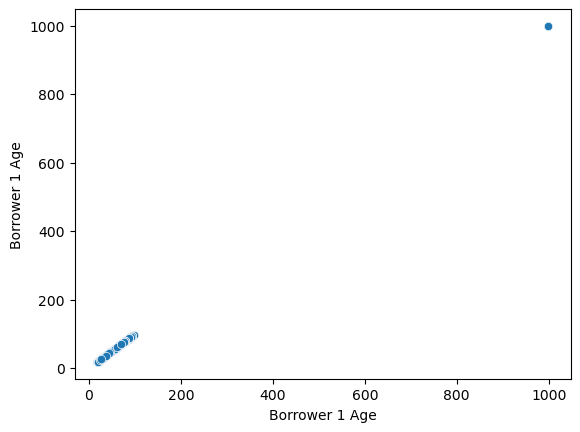

In [42]:
# Check for outlier values for Borrower 1 Age and Borrower 2 Age columns

sns.scatterplot(x = 'Borrower 1 Age', y = 'Borrower 1 Age',data = df_combined)

<Axes: xlabel='Borrower 2 Age', ylabel='Borrower 2 Age'>

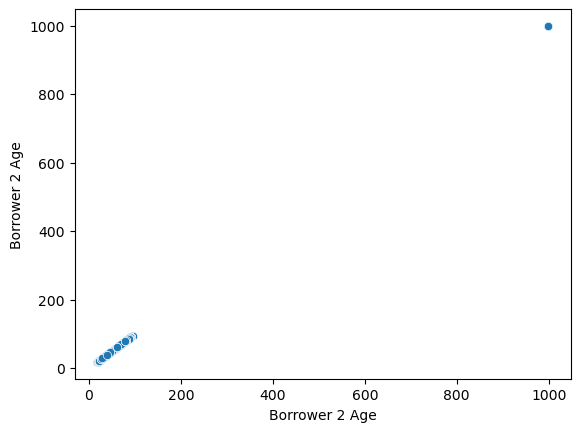

In [43]:
sns.scatterplot(x = 'Borrower 2 Age', y = 'Borrower 2 Age',data = df_combined)

In [44]:
# Check for outlier values

df_combined.loc[df_combined['Borrower 1 Age'] > 150]

,Year,LoanCharacteristicsID,State Code,County Code,Total Monthly Income Amount,Loan Purpose Type,Mortgage Type Code,Borrower Count,First Time Homebuyer Indicator,Borrower 1 Race Type,...,Property Usage Type,Property Unit Count,Note Rate Percent,Note Amount,Total Debt Expense Ratio Percent,Borrower 1 Credit Score Value,Borrower 2 Credit Score Value,Property Type Code,Borrower 1 Ethnicity Type,Borrower 2 Ethnicity Type
47584,2021,2616201,36,15,6248,1,0,2,0,5,...,1,1,2.625,85500,17.166,5,5,PT01,2,2
47712,2021,2616329,36,67,7090,6,0,1,0,5,...,1,1,2.875,88000,14.000,3,9,PT01,2,5
47825,2021,2645561,36,67,8362,6,0,2,0,6,...,1,1,2.500,194500,38.000,4,3,PT01,3,3
47828,2021,2645564,36,45,7741,1,0,1,0,5,...,1,1,2.375,124000,34.319,4,9,PT01,2,5
47892,2021,2660556,36,109,14527,1,0,2,1,5,...,1,1,3.000,289750,27.490,4,5,PT01,2,2
47898,2021,2660562,36,109,6764,1,0,1,0,5,...,1,2,2.875,308000,40.070,5,9,PT04,2,5
47951,2021,2660615,36,15,4075,2,0,1,0,5,...,1,1,3.000,106000,23.680,5,9,PT01,2,5
26291,2022,2704170,36,93,9483,6,0,2,0,5,...,1,1,3.125,217500,41.880,4,3,PT01,2,2


8 rows with outlier observations for Borrower 1

In [45]:
df_combined.loc[df_combined['Borrower 2 Age'] > 150]

,Year,LoanCharacteristicsID,State Code,County Code,Total Monthly Income Amount,Loan Purpose Type,Mortgage Type Code,Borrower Count,First Time Homebuyer Indicator,Borrower 1 Race Type,...,Property Usage Type,Property Unit Count,Note Rate Percent,Note Amount,Total Debt Expense Ratio Percent,Borrower 1 Credit Score Value,Borrower 2 Credit Score Value,Property Type Code,Borrower 1 Ethnicity Type,Borrower 2 Ethnicity Type
0,2019,2407198,50,7,7308,1,1,1,1,5,...,1,1,4.000,319113,40.46,1,9,PT01,2,5
4,2019,2407202,23,31,15240,1,0,1,1,5,...,1,1,4.625,233200,34.95,5,9,PT01,2,5
7,2019,2407205,25,17,10165,1,0,1,1,5,...,1,1,4.500,420000,39.82,5,9,PT06,2,5
9,2019,2407207,25,23,5839,6,0,1,1,5,...,1,1,4.875,328000,40.38,5,9,PT01,2,5
14,2019,2407212,25,23,16425,1,0,1,1,5,...,1,1,4.500,212000,34.63,5,9,PT01,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33010,2022,2743907,20,173,7006,2,0,1,0,5,...,1,1,5.000,272305,43.07,4,9,PT01,2,5
33011,2022,2743908,8,101,8615,1,1,1,1,5,...,1,1,5.250,358388,36.96,3,9,PT01,1,5
33012,2022,2743909,8,41,11027,1,2,1,0,5,...,1,1,4.875,511800,69.90,5,9,PT07,2,5
33014,2022,2743911,8,123,7067,1,2,1,1,5,...,1,1,4.750,439890,43.38,5,9,PT07,1,5


110368 rows with outlier observations for Borrower 2

In [46]:
# Replace outlier values with nan values

df_combined.loc[df_combined['Borrower 1 Age'] >150, 'Borrower 1 Age'] = np.nan
df_combined.loc[df_combined['Borrower 2 Age'] >150, 'Borrower 2 Age'] = np.nan

In [47]:
# Run describe function for dataframe

df_combined.describe()

,Total Monthly Income Amount,Borrower Count,Borrower 1 Age,Borrower 2 Age,Property Unit Count,Note Rate Percent,Note Amount,Total Debt Expense Ratio Percent,Borrower 1 Credit Score Value,Borrower 2 Credit Score Value
count,2.697810e+05,269781.000000,269773.000000,159413.000000,269781.000000,269781.000000,2.697810e+05,269781.000000,269781.000000,269781.000000
mean,9.896965e+03,1.596951,44.534068,44.109263,1.009233,3.523967,2.339513e+05,30.565076,4.387985,6.284334
std,1.224284e+04,0.502796,13.423042,13.088673,0.110767,0.838235,1.266437e+05,9.624545,0.827183,2.346964
min,7.830000e+02,1.000000,18.000000,18.000000,1.000000,1.625000,1.150000e+04,0.000000,1.000000,1.000000
25%,5.569000e+03,1.000000,34.000000,34.000000,1.000000,2.875000,1.390000e+05,23.320000,4.000000,4.000000
50%,8.256000e+03,2.000000,42.000000,42.000000,1.000000,3.375000,2.089000e+05,30.760000,5.000000,5.000000
75%,1.184000e+04,2.000000,54.000000,53.000000,1.000000,3.875000,3.028000e+05,38.040000,5.000000,9.000000
max,4.359000e+06,6.000000,98.000000,95.000000,4.000000,7.625000,1.300000e+06,145.750000,9.000000,9.000000


In [48]:
df_nan = df_combined[df_combined['Borrower 1 Age'].isnull() == True]

In [49]:
df_nan

,Year,LoanCharacteristicsID,State Code,County Code,Total Monthly Income Amount,Loan Purpose Type,Mortgage Type Code,Borrower Count,First Time Homebuyer Indicator,Borrower 1 Race Type,...,Property Usage Type,Property Unit Count,Note Rate Percent,Note Amount,Total Debt Expense Ratio Percent,Borrower 1 Credit Score Value,Borrower 2 Credit Score Value,Property Type Code,Borrower 1 Ethnicity Type,Borrower 2 Ethnicity Type
47584,2021,2616201,36,15,6248,1,0,2,0,5,...,1,1,2.625,85500,17.166,5,5,PT01,2,2
47712,2021,2616329,36,67,7090,6,0,1,0,5,...,1,1,2.875,88000,14.000,3,9,PT01,2,5
47825,2021,2645561,36,67,8362,6,0,2,0,6,...,1,1,2.500,194500,38.000,4,3,PT01,3,3
47828,2021,2645564,36,45,7741,1,0,1,0,5,...,1,1,2.375,124000,34.319,4,9,PT01,2,5
47892,2021,2660556,36,109,14527,1,0,2,1,5,...,1,1,3.000,289750,27.490,4,5,PT01,2,2
47898,2021,2660562,36,109,6764,1,0,1,0,5,...,1,2,2.875,308000,40.070,5,9,PT04,2,5
47951,2021,2660615,36,15,4075,2,0,1,0,5,...,1,1,3.000,106000,23.680,5,9,PT01,2,5
26291,2022,2704170,36,93,9483,6,0,2,0,5,...,1,1,3.125,217500,41.880,4,3,PT01,2,2


In [50]:
# Check for outlier values

df_combined.loc[df_combined['Total Monthly Income Amount'] > 100000]

,Year,LoanCharacteristicsID,State Code,County Code,Total Monthly Income Amount,Loan Purpose Type,Mortgage Type Code,Borrower Count,First Time Homebuyer Indicator,Borrower 1 Race Type,...,Property Usage Type,Property Unit Count,Note Rate Percent,Note Amount,Total Debt Expense Ratio Percent,Borrower 1 Credit Score Value,Borrower 2 Credit Score Value,Property Type Code,Borrower 1 Ethnicity Type,Borrower 2 Ethnicity Type
962,2019,2422549,25,25,118399,6,0,2,1,5,...,1,1,4.125,474600,12.37,5,5,PT06,2,2
6474,2019,2425180,55,79,123419,2,0,2,1,5,...,1,1,4.250,129900,2.34,3,5,PT01,2,2
6700,2019,2425406,15,1,138581,1,0,2,1,5,...,1,1,4.250,571200,21.13,4,5,PT06,2,2
6994,2019,2425700,17,31,137996,6,0,1,1,5,...,1,1,4.000,484000,5.05,5,9,PT01,2,5
12460,2019,2445270,55,125,112746,1,0,2,0,5,...,2,1,3.875,452000,8.09,5,5,PT01,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26633,2022,2717717,10,5,114248,1,0,2,0,5,...,1,1,4.375,581875,17.88,3,4,PT07,2,2
27653,2022,2723100,42,17,108951,1,0,1,1,5,...,1,1,3.875,600000,16.77,4,9,PT07,2,5
28876,2022,2708738,31,55,117951,1,0,1,0,5,...,2,1,4.000,647200,5.88,4,9,PT07,2,5
30279,2022,2721476,31,55,111378,6,0,2,0,5,...,1,1,2.750,510000,9.53,4,4,PT07,2,2


In [51]:
# Replace missing age values with mean values

df_combined['Borrower 1 Age'].fillna(45, inplace=True)
df_combined['Borrower 2 Age'].fillna(44, inplace=True)

In [52]:
# Check for missing values

df_combined.isnull().sum()

Year                                0
LoanCharacteristicsID               0
State Code                          0
County Code                         0
Total Monthly Income Amount         0
Loan Purpose Type                   0
Mortgage Type Code                  0
Borrower Count                      0
First Time Homebuyer Indicator      0
Borrower 1 Race Type                0
Borrower 2 Race Type                0
Borrower 1 Gender Type              0
Borrower 2 Gender Type              0
Borrower 1 Age                      0
Borrower 2 Age                      0
Property Usage Type                 0
Property Unit Count                 0
Note Rate Percent                   0
Note Amount                         0
Total Debt Expense Ratio Percent    0
Borrower 1 Credit Score Value       0
Borrower 2 Credit Score Value       0
Property Type Code                  0
Borrower 1 Ethnicity Type           0
Borrower 2 Ethnicity Type           0
dtype: int64

## 6. Create subset dataframe

In [53]:
# Create subset dataframe for Loan Purpose Type = Purchase

df =  df_combined[df_combined['Loan Purpose Type']=='1']

In [54]:
# Check output

df.head()

,Year,LoanCharacteristicsID,State Code,County Code,Total Monthly Income Amount,Loan Purpose Type,Mortgage Type Code,Borrower Count,First Time Homebuyer Indicator,Borrower 1 Race Type,...,Property Usage Type,Property Unit Count,Note Rate Percent,Note Amount,Total Debt Expense Ratio Percent,Borrower 1 Credit Score Value,Borrower 2 Credit Score Value,Property Type Code,Borrower 1 Ethnicity Type,Borrower 2 Ethnicity Type
0,2019,2407198,50,7,7308,1,1,1,1,5,...,1,1,4.000,319113,40.46,1,9,PT01,2,5
1,2019,2407199,50,7,7416,1,1,2,0,5,...,1,1,4.250,248005,45.67,3,2,PT01,2,2
2,2019,2407200,50,15,5143,1,1,2,0,5,...,1,1,4.250,211105,46.23,2,3,PT01,2,2
3,2019,2407201,50,17,8866,1,2,2,0,5,...,1,1,4.875,210000,36.88,4,2,PT01,2,2
4,2019,2407202,23,31,15240,1,0,1,1,5,...,1,1,4.625,233200,34.95,5,9,PT01,2,5


In [55]:
df.shape

(101205, 25)

## 7. Export the new dataframe

In [56]:
# Export combined data as a pickle file

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'FHL_bank_data_combined.pkl'))